## 목표 : 많은 특성의 데이터셋에서 과대적합

- 데이터 : Length, Height, Width

- 타겟 : Weight

- [조건] 
    * 특성 추가 = degree = 5로 설정
    * 특성을 기반으로 무게 예측 => 지도학습 + 회귀

In [18]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
file = '../data/perch3.csv'
perchDF = pd.read_csv(file)
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
 2   Height  56 non-null     float64
 3   Width   56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


[2] 데이터 확인<hr>

[2-1] 피처 & 타겟 분리

In [25]:
targetDF = perchDF['Weight']
featureDF = perchDF[perchDF.columns[1:]]

print(f'FeatureDF => {featureDF.shape}    TargetDF => {targetDF.shape}')

FeatureDF => (56, 3)    TargetDF => (56,)


KeyError: "None of [Index([ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0,\n       21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5,\n       24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7,\n       30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0,\n       40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0],\n      dtype='float64')] are in the [columns]"

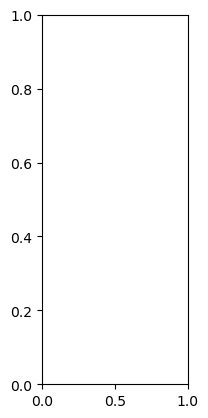

In [28]:
import matplotlib.pyplot as plt
# feature& target 관계
for idx in range(1,4) :
    col_name = featureDF.columns[idx-1]
    plt.subplot(1,3, idx)
    plt.plot(targetDF, featureDF[featureDF[col_name]], 'o', label = col_name)
    plt.legend()
plt.tight_layout()
plt.show

# 직선의 형태는 아니지만 곡선이 양의 방향/비례 형태

[3] 데이터 가공 <hr>
- 특성 추가
- 특성 스케일링

[3-1] 특성 추가

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =5, include_bias=False)

poly.fit(featureDF)
poly_feature = poly.transform(featureDF)


In [23]:
print(f'특성추가 -> {poly_feature.shape}\n{poly.feature_names_in_} => {poly.get_feature_names_out}')

특성추가 -> (56, 56)
['Length' 'Height' 'Width'] => <bound method PolynomialFeatures.get_feature_names_out of PolynomialFeatures(degree=5)>


[3-2] 피처 스케일링
- 훈련용 & 테스트용 분리

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_feature, 
                                                    targetDF,
                                                    random_state=5)

In [40]:
print(f'X train = > {X_train.shape}, X_test => {X_test.shape}')
print(f'y train = > {y_train.shape}, y_test => {y_test.shape}')

X train = > (42, 55), X_test => (14, 55)
y train = > (42,), y_test => (14,)


In [41]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [44]:
scaled_X_train = std_scaler.transform(X_train)
scaled_X_test = std_scaler.transform(X_test)

[4] 학습진행 -> 회귀

In [46]:
from sklearn.linear_model import LinearRegression
lr_mdl = LinearRegression()
lr_mdl.fit(scaled_X_train, y_train)

train_score = lr_mdl.score(scaled_X_train, y_train)
test_score = lr_mdl.score(scaled_X_test, y_test)

print(f'TRAIN SCORE => {train_score}, TEST SCORE => {test_score}') # 과대적합

TRAIN SCORE => 1.0, TEST SCORE => -38.767868061603046


### 규제 : 가중치 값을 조절해서 과대적합 문제 해결! <hr>
- Ridge : 모든 피처에 가중치를 0에 가깝게 조절.
- Lasso : 특정 피처에 가중치를 0으로 해서 차원 축소 부여.

[규제1] Ridge

In [47]:
from sklearn.linear_model import Ridge

In [58]:
rdge_mdl = Ridge(max_iter = 100) # max_iter = 줘도 안줘도 나옴.
rdge_mdl.fit(scaled_X_train, y_train)

Ridge(max_iter=100)

In [59]:
train_score = rdge_mdl.score(scaled_X_train, y_train)
test_score = rdge_mdl.score(scaled_X_test, y_test)

print(f'[Ridge model] TRAIN SCORE => {train_score}, TEST SCORE => {test_score}')

[Ridge model] TRAIN SCORE => 0.9874355208005008, TEST SCORE => 0.9914491207423642


In [60]:
# 모델 파라미터
print(rdge_mdl.n_iter_, rdge_mdl.coef_, rdge_mdl.intercept_, sep='\n\n')

None

[ 1.83176874e+00 -7.23677789e+00  1.03067055e+01  1.57775249e+01
  1.18446480e+01  1.67466597e+01  9.57952490e+00  1.47797173e+01
  2.48615142e+01  1.85163425e+01  1.67577526e+01  1.46142404e+01
  1.58382863e+01  1.38108100e+01  1.64490445e+01  1.56379186e+01
  1.39352928e+01  1.71480760e+01  2.50779150e+01  1.42694832e+01
  1.39921892e+01  6.23690826e+00  1.41806030e+01  6.32646330e+00
  2.93976268e+00  1.47629117e+01  7.00986521e+00  3.97399179e+00
  5.70584401e+00  1.56796396e+01  8.23737024e+00  5.75159002e+00
  8.24469917e+00  1.54675618e+01  5.86439125e+00  6.81074624e+00
 -5.88111799e+00  8.02129126e+00 -4.97701429e+00 -1.36851639e+01
  9.44134707e+00 -3.67900627e+00 -1.22792895e+01 -1.61590708e+01
  1.10232306e+01 -2.01766706e+00 -1.03096090e+01 -1.36546600e+01
 -1.21067571e+01  1.27255386e+01 -1.99919223e-02 -7.79070771e+00
 -1.04001988e+01 -7.93557014e+00 -7.20881695e-01]

365.6404761904762


In [62]:
# ===>  최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1.0, 10.0, 20.0, 30.0]
rdgeScore = [[], []] # 왼쪽에는 train점수 오른쪽에는 test점수가 들어갈것.
for a in alphas : 
    rdge_mdl = Ridge(alpha=a) 
    rdge_mdl.fit(scaled_X_train, y_train)
    train_score = rdge_mdl.score(scaled_X_train, y_train)
    test_score = rdge_mdl.score(scaled_X_test, y_test)

    rdgeScore[0].append(train_score)
    rdgeScore[1].append(test_score)



In [85]:
# 테스트 점수가 가장 높은 알파 = 1.0
idx = rdgeScore[1].index(max(rdgeScore[1])) # 테스트 점수의 최댓값인 지점의 인덱스  ### 근데 왜 리스트에 담죠? 이유가 뭐지? 이해못함
best_alpha = alphas[idx]
print(best_alpha)

1.0


Text(0.5, 1.0, 'alpha & Ridge')

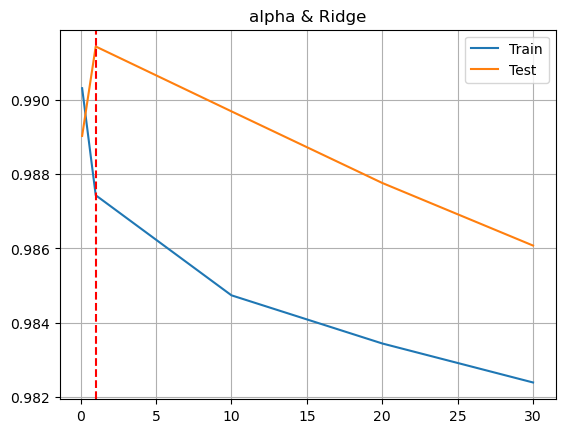

In [88]:
# 학습 및 테스트 점수 확인
import matplotlib.pyplot as plt

plt.plot(alphas, rdgeScore[0], label = 'Train')
plt.plot(alphas, rdgeScore[1], label = 'Test')
plt.axvline(best_alpha, linestyle='--', color = 'red')
plt.legend()
plt.grid()
plt.title('alpha & Ridge')

[규제 2] lasso 

In [72]:
from sklearn.linear_model import Lasso

lasso_mdl = Lasso()
lasso_mdl.fit(scaled_X_train, y_train)

c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [73]:
train_score = lasso_mdl.score(scaled_X_train, y_train)
test_score = lasso_mdl.score(scaled_X_test, y_test)

print(f'[lasso model] TRAIN SCORE => {train_score}, TEST SCORE => {test_score}')

[lasso model] TRAIN SCORE => 0.9865761752892273, TEST SCORE => 0.9912639062921962


In [74]:
print(lasso_mdl.n_iter_, lasso_mdl.coef_, lasso_mdl.intercept_, sep='\n\n')

1000

[ 0.          0.          0.          8.39678696  0.          0.
 13.70952971  0.         87.23199451 91.06954235 16.61716411  0.
 35.69479723  0.          0.         46.93195311  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         41.8984421
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
 -0.        ]

365.6404761904762


In [83]:
# ===>  최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1.0, 10.0, 20.0, 30.0]
lassoScore = [[], []] # 왼쪽에는 train점수 오른쪽에는 test점수가 들어갈것.
for a in alphas : 
    lasso_mdl = Lasso(alpha=a, max_iter =30000) 
    lasso_mdl.fit(scaled_X_train, y_train)
    train_score = lasso_mdl.score(scaled_X_train, y_train)
    test_score = lasso_mdl.score(scaled_X_test, y_test)

    lassoScore[0].append(train_score)
    lassoScore[1].append(test_score)


In [84]:
# 테스트 점수가 가장 높은 알파 = 1.0
best_alpha = lassoScore[1].index(max(lassoScore[1])) # 테스트 점수의 최댓값인 지점의 인덱스  ### 근데 왜 리스트에 담죠? 이유가 뭐지? 이해못함
print(best_alpha)

1


Text(0.5, 1.0, 'alpha & Lasso')

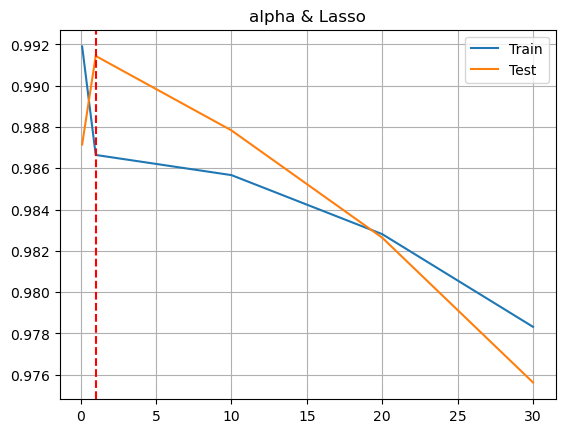

In [89]:
# 학습 및 테스트 점수 확인
import matplotlib.pyplot as plt

plt.plot(alphas, lassoScore[0], label = 'Train')
plt.plot(alphas, lassoScore[1], label = 'Test')
plt.axvline(best_alpha, linestyle='--', color = 'red')
plt.legend()
plt.grid()
plt.title('alpha & Lasso')

In [ ]:
# 과대적합이 일어나는 경우
# 데이터셋이 너무 적을 때
# 피처가 너무 많을 때
# 

In [90]:
# CV(교차검증)


# Kfold k개의 성능 평가 결과.